# Lista 2


### Zadanie 1
* Pełni wigoru powtórzymy zadanie 5 z listy 1, usuwając ostatnie cyfry w dwóch współrzędnych wektora $A$.

In [1]:
### Identyczny kod jak ostatnio ###

function front_sum(A, B, size, breed) # frontward
    sum = breed(0.0)
    for i in 1:size
        sum += breed(A[i]) * breed(B[i])
    end
    return sum
end

function back_sum(A, B, size, breed) # backward
    sum = breed(0.0)
    for i in size:-1:1
        sum += breed(A[i]) * breed(B[i])
    end
    return sum
end

function sum_helper(NewA, breed) # help function, beacuse I am not sure how does Base.sum work
    sum = breed(0.0)
    for i in 1:size(NewA)[1]
        sum += NewA[i]
    end
    return sum
end

function smallest_to_biggest_sum(A, B, size, breed) 
    P = []
    N = []
    for i in 1:size
        mult = breed(A[i]) * breed(B[i]) # simulated dot product
        if mult >= 0 # positive mults go to positive array, same with negative, they go to negative
            append!(P, mult)
        else 
            append!(N, mult)
        end
    end
    P = sort(P, rev = true)
    N = sort(N, rev = true)
    positive = sum_helper(P, breed)
    negative = sum_helper(N, breed)
    return breed(positive + negative)
end

function biggest_to_smallest_sum(A, B, size, breed)
    P = []
    N = []
    for i in 1:size
        mult = breed(A[i]) * breed(B[i]) # simulated dot product
        if mult >= 0 # positive mults go to positive array, same with negative, they go to negative
            append!(P, mult)
        else 
            append!(N, mult)
        end
    end
    P = sort(P)
    N = sort(N)
    positive = sum_helper(P, breed)
    negative = sum_helper(N, breed)
    return breed(positive + negative)
end

biggest_to_smallest_sum (generic function with 1 method)

In [2]:
using LinearAlgebra
A = [2.718281828, -3.141592654, 1.414213562, 0.577215664, 0.301029995]
B = [1486.2497, 878366.9879, -22.37492, 4773714.647, 0.000185049]

println("by LinearAlgebra: ")
println("Float64: ", dot(A,B))
println("frontward sum:")
println("Float32: ",front_sum(A,B,5, Float32))
println("Float64: ",front_sum(A,B,5, Float64))
# println(front_sum(A,B,5, BigFloat))
println("backward sum:")
println("Float32: ",back_sum(A,B,5, Float32))
println("Float64: ",back_sum(A,B,5, Float64))
# println(back_sum(A,B,5, BigFloat))
println("biggest to smallest sum:")
println("Float32: ",biggest_to_smallest_sum(A,B,5, Float32))
println("Float64: ",biggest_to_smallest_sum(A,B,5, Float64))
println("smallest to biggest sum:")
println("Float32: ",smallest_to_biggest_sum(A,B,5, Float32))
println("Float64: ",smallest_to_biggest_sum(A,B,5, Float64))

by LinearAlgebra: 
Float64: -0.004296342739891585
frontward sum:
Float32: -0.4999443
Float64: -0.004296342739891585
backward sum:
Float32: -0.4543457
Float64: -0.004296342998713953
biggest to smallest sum:
Float32: -0.5
Float64: -0.004296342842280865
smallest to biggest sum:
Float32: -0.5
Float64: -0.004296342842280865


```julia
Wyniki z porpzedniej listy:
by LinearAlgebra: 
Float64: 1.0251881368296672e-10
frontward sum:
Float32: -0.4999443
Float64: 1.0251881368296672e-10
backward sum:
Float32: -0.4543457
Float64: -1.5643308870494366e-10
biggest to smallest sum:
Float32: -0.5
Float64: 0.0
smallest to biggest sum:
Float32: -0.5
Float64: 0.0
```

Wyniki zmieniły się tylko dla Float64 co jest zrozumiałe ze względu na to, że prezcyzja liczb w wektorze jest większa niż przecyzja Float32. Na przykład:

In [3]:
Float32(0.5772156649)

0.5772157f0

Dla Float64 wyniki zmieniły się znacznie. Na przykład w przypadku sumy "do przodu" aż o 8 miejsc znaczących. Jest to spowodowane dokładnością arytmetyki Float64 oraz propagacją błędu poprzednich wyliczeń.

### Zadanie 2
* Pokażemy dziwne zachowanie wykresu funkcji $e^x\ln(1 + e^{-x})$ na trzech róznych oprogramowaniach do rysowania wykresów funkcji.
* Policzymy granicę funkcji.
* Wyjaśnimy jej nietypowe zachowanie.

Wykresy:

wolfram alpha:
![wolfram](wolfram.png)

demos:
![demos](demos.png)

pyplot:
![pyplot](pyplot.png)


Wykresy funkcji bardzo się różnią od siebie, mają pewne cechy wspólne: 
* zakres wartość od $0$ do $2$. Z wyjątkiem wykresu w pyplocie, który osiąga swoje maksimum trochę nad 1.
* i co ciekawe, dla okolic $x \geq 40$ $f(x) = 0$.

Różnice:
* wykres w pyplocie i wolframie wygląda na ciągły, kiedy demos daje za wygraną i rysuje funkcję nieciągłą.

Korzystając z reguły de l'Hospitala wyliczamy, że:
$\lim_{x \to \infty} f(x) = \lim_{x \to \infty} \frac{{\ln(1 + e^{-x})}}{e^{-x}} = \lim_{x \to \infty} \frac{ \frac{-1}{e^x + 1}}{- e^{-x}} = \lim_{x \to \infty} \frac{ \frac{1}{e^x + 1}}{e^{-x}} = \lim_{x \to \infty} \frac{e^x}{e^x + 1} = 1$. 

Każdy wykres sugeruje, że granicą jest $0$. Bazując na wykresach widizmy, że dla $x\geq40$ $f(x) = 0$.

Grube odchylenie wartosci od liczby $1.0$, do której funkcja powinan zbiegać, jest spowodowane błędami wynikającymi z mnożenia logarytmu naturalnego, którego wartość jest bardzo mała przez bardzo dużą względem niego liczbę $e^x$.

Natomiast sytuacja zbiegania do $0.0$, dla $x \geq 40$ jest spowodowana dodawaniem bardzo małej wartości $e^{-x}$ do $1$ pod logarytmem. Przybliżenie wartości tej sumy to $1$ a więc i logarytm jest równy $0$.

### Zadanie 3
* Mamy rozwiązać równanie $Ax = b$, gdzie $A \in \mathbb{R}^{n\times n}$ oraz $x, b \in \mathbb{R}^{n}$. Zrobimy to na dwa sposoby:
    * eliminacją Gaussa,
    * odwracając macierz.
* Testy mamy przeprowadzić na różnych wariantach macierzy, wykorzystamy funckję 
```julia 
hilb(n::Int)
```
oraz 
```julia 
matcond(n::Int, c::Float64)
```
napisane przez dr. Zielińskiego.
* Błąd względny policzymy według wzoru $\frac{||x - \widetilde{x}||}{||x||}$, gdzie $||\quad||$ oznacze normę macierzy.

In [4]:
function hilb(n::Int)
# Function generates the Hilbert matrix  A of size n,
#  A (i, j) = 1 / (i + j - 1)
# Inputs:
#  n: size of matrix A, n>=1
#
#
# Usage: hilb(10)
#
# Pawel Zielinski
        if n < 1
         error("size n should be >= 1")
        end
        return [1 / (i + j - 1) for i in 1:n, j in 1:n]
end

hilb (generic function with 1 method)

In [5]:
using LinearAlgebra

function matcond(n::Int, c::Float64)
# Function generates a random square matrix A of size n with
# a given condition number c.
# Inputs:
#	n: size of matrix A, n>1
#	c: condition of matrix A, c>= 1.0
#
# Usage: matcond(10, 100.0)
#
# Pawel Zielinski
        if n < 2
         error("size n should be > 1")
        end
        if c< 1.0
         error("condition number  c of a matrix  should be >= 1.0")
        end
        (U,S,V)=svd(rand(n,n))
        return U*diagm(0 =>[LinRange(1.0,c,n);])*V'
end

matcond (generic function with 1 method)

In [6]:
function testing(A, n, A_name)
    x = [1.0 for i in 1:n] # identity vector is generated every time new matrix is being tested.
    b = A * x
    
    gauss = A \ b # default, julia implemented
    by_inv = inv(A) * b
    println("#### ", A_name, "-condition: ", cond(A))
    println("by_gauss: ", norm(x - gauss, 2)/norm(x, 2), "\t")
    println("by_inver: ", norm(x - by_inv, 2)/norm(x, 2))
end
    
function generating_hilberts(how_many)
    println("Hilberts:")
    for n in 1:how_many
        hilbert = hilb(n)
        testing(hilbert, n, "Hilbert_" * string(n))
    end
end
generating_hilberts(20)

        

Hilberts:
#### Hilbert_1-condition: 1.0
by_gauss: 0.0	
by_inver: 0.0
#### Hilbert_2-condition: 19.28147006790397
by_gauss: 5.661048867003676e-16	
by_inver: 1.4043333874306803e-15
#### Hilbert_3-condition: 524.0567775860644
by_gauss: 8.022593772267726e-15	
by_inver: 0.0
#### Hilbert_4-condition: 15513.73873892924
by_gauss: 4.137409622430382e-14	
by_inver: 0.0
#### Hilbert_5-condition: 476607.25024259434
by_gauss: 1.6828426299227195e-12	
by_inver: 3.3544360584359632e-12
#### Hilbert_6-condition: 1.4951058642254665e7
by_gauss: 2.618913302311624e-10	
by_inver: 2.0163759404347654e-10
#### Hilbert_7-condition: 4.75367356583129e8
by_gauss: 1.2606867224171548e-8	
by_inver: 4.713280397232037e-9
#### Hilbert_8-condition: 1.5257575538060041e10
by_gauss: 6.124089555723088e-8	
by_inver: 3.07748390309622e-7
#### Hilbert_9-condition: 4.931537564468762e11
by_gauss: 3.8751634185032475e-6	
by_inver: 4.541268303176643e-6
#### Hilbert_10-condition: 1.6024416992541715e13
by_gauss: 8.67039023709691e-5	
by_i

In [7]:
function generating_randoms()
    println("Randoms:")
    for n in [5, 10, 20]
        for c_exponent in [0, 1, 3, 7, 12, 16]
            random = matcond(n, Float64(10^c_exponent))
            testing(random, n, "Rand_" * string(n) * "_" * string(c_exponent)) # Rand_(n)_(exponent)
        end
    end
end

generating_randoms()

Randoms:
#### Rand_5_0-condition: 1.0000000000000009
by_gauss: 2.482534153247273e-16	
by_inver: 2.220446049250313e-16
#### Rand_5_1-condition: 9.99999999999999
by_gauss: 2.7194799110210365e-16	
by_inver: 2.2752801345137457e-16
#### Rand_5_3-condition: 999.9999999999758
by_gauss: 6.2889994144950016e-15	
by_inver: 1.1771296360302492e-14
#### Rand_5_7-condition: 9.999999992153633e6
by_gauss: 1.027930256708051e-10	
by_inver: 8.497620770158499e-11
#### Rand_5_12-condition: 9.999408880302942e11
by_gauss: 3.503538596435152e-5	
by_inver: 3.321197335766436e-5
#### Rand_5_16-condition: 7.110538605127265e15
by_gauss: 0.1911305421070408	
by_inver: 0.09375
#### Rand_10_0-condition: 1.0000000000000007
by_gauss: 3.080743865682491e-16	
by_inver: 3.4577699597798515e-16
#### Rand_10_1-condition: 10.000000000000005
by_gauss: 2.895107444979072e-16	
by_inver: 2.3022074639253675e-16
#### Rand_10_3-condition: 999.999999999934
by_gauss: 2.7194799110210367e-15	
by_inver: 8.16448078515563e-15
#### Rand_10_7-con

Przeprowadzone testy pokazują, że metoda Gaussa daje mniejszy błąd względny niż metoda inwersji macierzy. Jest to polecany sposób na wyliczanie $x$ o czym możemy przeczytać w dokumetnacji pakietu LinearAlgebra. Należy jeszcze zauważyć, że rzeczywiście macierz Hilberta jest żle uwarunkowana, pole "condition" bardzo szybko rośnie.

### Zadanie 4
* Policzymy $|P(z_k)|$, $|p(z_k)|$, $|P'(z_k)|$ i $|z_k − k|$, gdzie $z_k$ to pierwiastek wielomianu $P$.
* Już obliczone współczynniki wielomianu $P$ są wprowadzone do konstruktora Polynomial.
* Wielomian $p$ jest zadany równaniem jak w zadaniu.
* Współczynniki wielomianu $P'$ są takie jak $P$ z drobną zmianą przy $x^{19}$.

In [8]:
using Polynomials

natural = Polynomial(reverse([1, -210.0, 20615.0,-1256850.0,
      53327946.0,-1672280820.0, 40171771630.0, -756111184500.0,          
      11310276995381.0, -135585182899530.0,
      1307535010540395.0,     -10142299865511450.0,
      63030812099294896.0,     -311333643161390640.0,
      1206647803780373360.0,     -3599979517947607200.0,
      8037811822645051776.0,      -12870931245150988800.0,
      13803759753640704000.0,      -8752948036761600000.0,
      2432902008176640000.0]))
# println(natural)
function wilkinson(x)
    return (x-1.0)*(x-2.0)*(x-3.0)*(x-4.0)*(x-5.0)*(x-6.0)*(x-7.0)*(x-8.0)*(x-9.0)*(x-10.0)*(x-11.0)*(x-12.0)*(x-13.0)*(x-14.0)*(x-15.0)*(x-16.0)*(x-17.0)*(x-18.0)*(x-19.0)*(x-20.0)
end
# println(wilkinson)

disturbed_wilkinson = Polynomial(reverse([1, -210.0 - 2^-23, 20615.0,-1256850.0,
      53327946.0,-1672280820.0, 40171771630.0, -756111184500.0,          
      11310276995381.0, -135585182899530.0,
      1307535010540395.0,     -10142299865511450.0,
      63030812099294896.0,     -311333643161390640.0,
      1206647803780373360.0,     -3599979517947607200.0,
      8037811822645051776.0,      -12870931245150988800.0,
      13803759753640704000.0,      -8752948036761600000.0,
      2432902008176640000.0]))
z_array = roots(natural) # getting natural's zeroes.

for (k , z) in enumerate(z_array)
    println("z_", k ," - ", k, ": ", abs(z - k))
    println("P (z_", k , ") = ", abs(natural(z)))
    println("P'(z_", k , ") = ", abs(disturbed_wilkinson(z)))
    println("p (z_", k , ") = ", abs(wilkinson(z)))
    println()
end

z_1 - 1: 3.0109248427834245e-13
P (z_1) = 35696.50964788257
P'(z_1) = 35696.50964788257
p (z_1) = 36626.4254824228

z_2 - 2: 2.8318236644508943e-11
P (z_2) = 176252.60026668405
P'(z_2) = 176252.60026668405
p (z_2) = 181303.9336725767

z_3 - 3: 4.0790348876384996e-10
P (z_3) = 279157.6968824087
P'(z_3) = 279157.6968824087
p (z_3) = 290172.2858891687

z_4 - 4: 1.626246826091915e-8
P (z_4) = 3.0271092988991085e6
P'(z_4) = 3.0271092988991085e6
p (z_4) = 2.04153729027509e6

z_5 - 5: 6.657697912970661e-7
P (z_5) = 2.2917473756567076e7
P'(z_5) = 2.611747418265974e7
p (z_5) = 2.0894625006962176e7

z_6 - 6: 1.0754175226779239e-5
P (z_6) = 1.2902417284205095e8
P'(z_6) = 1.9471570309880203e8
p (z_6) = 1.1250484577562997e8

z_7 - 7: 0.00010200279300764947
P (z_7) = 4.805112754602064e8
P'(z_7) = 1.8143790320679333e9
p (z_7) = 4.5729086427309465e8

z_8 - 8: 0.0006441703922384079
P (z_8) = 1.6379520218961136e9
P'(z_8) = 1.879440622667089e10
p (z_8) = 1.5556459377357383e9

z_9 - 9: 0.00291529436205273

Rozbieżność w wynikach pochodzi z dokładności z jaką możemy reprezentować liczby rzeczywiste w dość rzadkim zbiorze liczb maszynowych. Każdy błąd, nawet najmniejszy, powiela się na kolejne operacje. Widzimy, że różnica pomiędzy $z_1$ i $1$ jest minimalna, niemniej wartość wyrażenia $P(z_1) = 35696.50964788257$, kiedy powinno być $0$. Innymi słowo, 13 cyfra po przecinku wygerenowała wynik bardzo odległy od spodziewanego w wielomianie, którego współczynniki są typu zmiennoprzecinkowego. 

Dużo lepiej radzi sobie za to wielomian $p$, którego wartość jest wyliczana poprzez wstawianie argumentu i liczenie iloczynu jednomianów.

Wielomian $P'$ mający odrobinę zmieniony współczynnik przy $x^{19}$ zaczyna się różnić od $P$ już przy $z_5$. Przekazując coraz większe liczby jako "miejsca zerowe" skala błędów zaczyna się coraz bardziej nawarstwiać. Dla $z_{20}$ już dla wszystkich wielomianów dostajemy liczby rzędu $10^{13}$ i większe. 

Jednym z powodów, dla których omawiamy te wielomiany jest fakt, że kiedy $P$ ma pierwiastki rzeczywiste to odrobine zniekształćony $P'$ ma już pierwiastki zespolone.

In [9]:
println("P:")
println(z_array)
println("P':")
println(roots(disturbed_wilkinson))

P:
[0.9999999999996989, 2.0000000000283182, 2.9999999995920965, 3.9999999837375317, 5.000000665769791, 5.999989245824773, 7.000102002793008, 7.999355829607762, 9.002915294362053, 9.990413042481725, 11.025022932909318, 11.953283253846857, 13.07431403244734, 13.914755591802127, 15.075493799699476, 15.946286716607972, 17.025427146237412, 17.99092135271648, 19.00190981829944, 19.999809291236637]
P':
Complex{Float64}[0.9999999999998357 + 0.0im, 2.0000000000550373 + 0.0im, 2.99999999660342 + 0.0im, 4.000000089724362 + 0.0im, 4.99999857388791 + 0.0im, 6.000020476673031 + 0.0im, 6.99960207042242 + 0.0im, 8.007772029099446 + 0.0im, 8.915816367932559 + 0.0im, 10.095455630535774 - 0.6449328236240688im, 10.095455630535774 + 0.6449328236240688im, 11.793890586174369 - 1.6524771364075785im, 11.793890586174369 + 1.6524771364075785im, 13.992406684487216 - 2.5188244257108443im, 13.992406684487216 + 2.5188244257108443im, 16.73074487979267 - 2.812624896721978im, 16.73074487979267 + 2.812624896721978im, 19

### Zadanie 5
* model wzrostu populacji, bardzo na czasie.
* zaimplementujemy równanie rekurencyjne, jak przystało na informatyków, iteracyjnie. A następnie przeprowadzimy wskazane testy.

In [10]:
function population_growth(p_0, r, breed, iterations=40)
    p = breed(p_0)
    r = breed(r)
    for i in 1:iterations
        p = p + r*p*(breed(1.0) - p)
    end
    return p
end

population_growth (generic function with 2 methods)

In [11]:
full = population_growth(0.01, 3, Float32, 40)
interval = population_growth(0.01, 3, Float32, 10)
interval = round(interval, RoundToZero, digits=3) # really though line
disturbed = population_growth(interval, 3, Float32, 30)
println("standard : ", full)
println("disturbed: ", disturbed)

standard : 0.25860548
disturbed: 1.093568


Efekt zaobserwowany w powyższym eksperymencie, to znaczy wpływ zaokrąglenia w 10 iteracji na dalsze wyniki jest nazywany - *sensitive dependence on initial conditions* (H.O. Peitgen, H. Jürgens, D. Saupe "Chaos and Fractals"). I rzeczywiście jest to trafna nazwa. Liczby są zupełnie różne, nietrudno się dziwić. Przy tak zadanej metodzie liczenia $p$ jesteśmy narażeni na wpływ dokładności aż w trzech miejscach to jest mamy dodawanie, mnożenie oraz tragiczne w skutkach odejmowaniu $1 - p$, które, gdy $p$ bliskie $1$ naraża na utrate cyfr znaczących.

Porównajmy jeszcze Float32 i Float64:

In [12]:
println("Float32: ", population_growth(0.01, 3, Float32, 40))
println("Float64: ", population_growth(0.01, 3, Float64, 40))

Float32: 0.25860548
Float64: 0.011611238029748606


Ponownie, precyzja arytmetyki ma ogromny wpływ na wynik, co widać porównując wyniki dla Float32 i Float64.

### Zadanie 6
* zaimplementujemy równanie rekurencyjne oraz przedstawimy wyniki na jednym wykresie razem oraz odddzielnie na siedmiu wykresach.

In [13]:
function foo(x_0, c, iterations=40) # function will return array of x_i
    x = Float64(x_0)
    c = Float64(c)
    sequence = Float64[]
    for i in 1:40
        x = x^2 + c
        append!(sequence,x)
    end
    return sequence
    
end

foo (generic function with 2 methods)

In [14]:
first = foo(1, -2)
two = foo(2, -2)
three = foo(1.99999999999999, -2)
four = foo(1, -1)
five = foo(-1, -1)
six = foo(0.75, -1)
seven = foo(0.25, -1)

40-element Array{Float64,1}:
 -0.9375
 -0.12109375
 -0.9853363037109375
 -0.029112368589267135
 -0.9991524699951226
 -0.0016943417026455965
 -0.9999971292061947
 -5.741579369278327e-6
 -0.9999999999670343
 -6.593148249578462e-11
 -1.0
  0.0
 -1.0
  ⋮
 -1.0
  0.0
 -1.0
  0.0
 -1.0
  0.0
 -1.0
  0.0
 -1.0
  0.0
 -1.0
  0.0

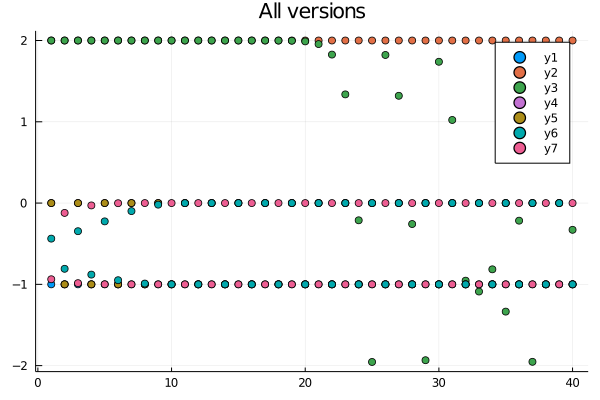

In [15]:
using Plots
gr()
plot(1:40, [first, two, three, four, five, six, seven], seriestype = :scatter, title = "All versions")

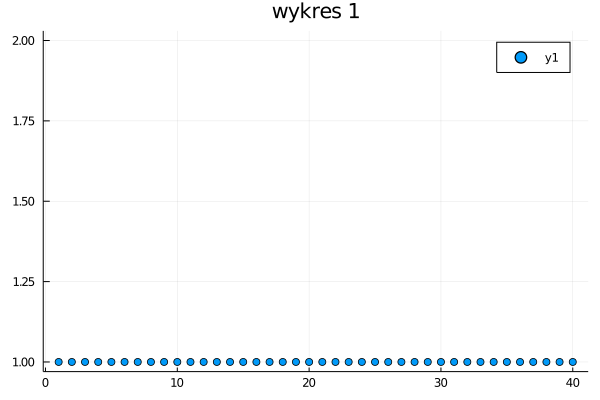

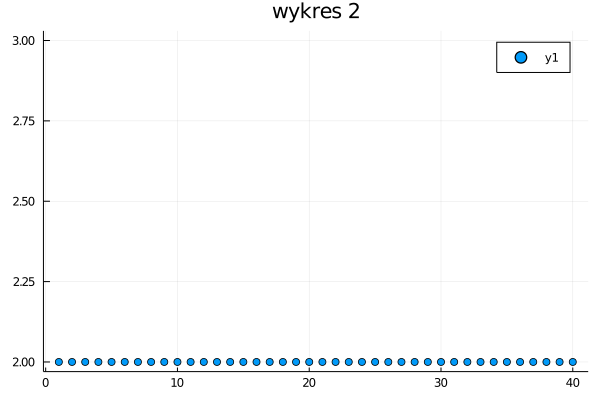

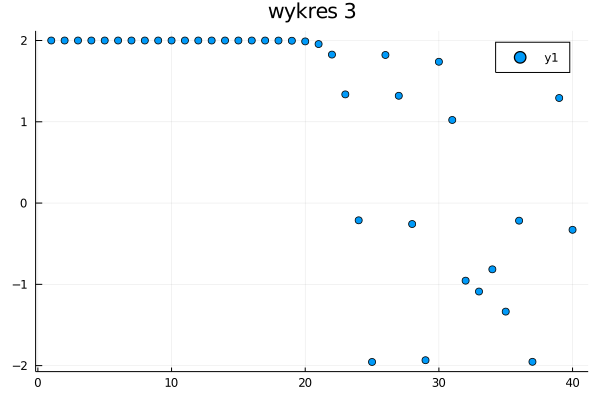

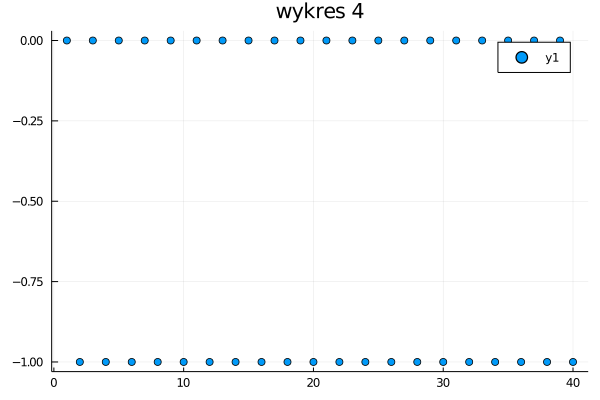

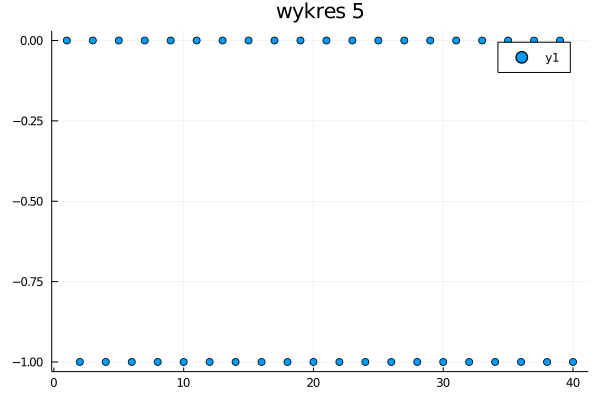

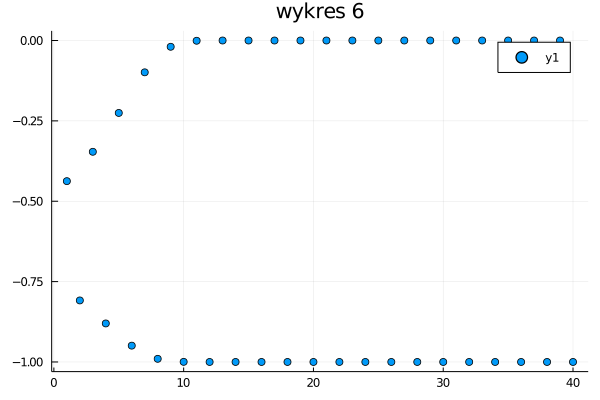

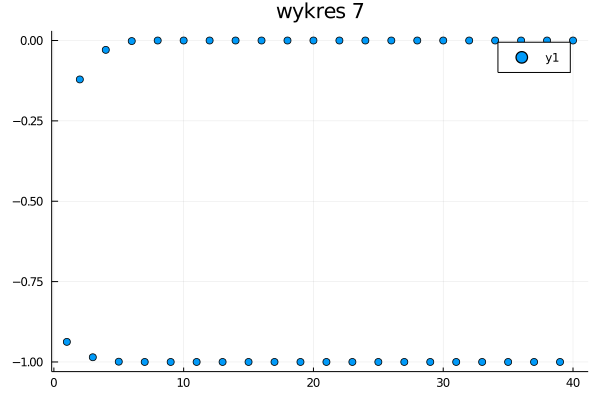

In [16]:
for (i,x) in enumerate([one, two, three, four, five, six, seven]) # not so pretty way to show all
    display(plot(1:40, x, seriestype = :scatter, title = "wykres $(i)"))
end

Powyższe zadanie przedstawia standardowy przykład OSFM (One-Step Feedback Machine). Przy odpowiednio zadanych parametrach tego typu maszyny mają niesamowitą cechę zbiegania do pewnej wartości, *punktu stałego*. I jest to spełnione w zasadzie dla każdych danych, z wyjątkiem $x = 1.99999999999999$, $c = -2$, które wprowadzają niestabilność numeryczną do obliczeń, która nawarstwia się przy kolejnych iteracjach.

Dla pozostałych przykładów, wykresy zbiegają do stałych wartości (wykres 1 -> 1, wykres 2 -> 2), (wykres 4, 5, 6, 7 -> 0 lub -1). W tych przypadkach nie jest to spowodowane precyzją arytmetyki, czy błędami tylko własnościami OSFM, niemniej występuje problem zaokrąglania, każde podniesienie do kwadratu $x^2$ zwiększą liczbę cyfr po przecinku dwa razy. Innymi słowy, przy wystarczająco długim iterowaniu wybór $x_0$ ze zbioru $[-1, 1]$ i stałym $c = -1$ daje takim sam wynik.